# Tide data processing
in this notebook we are going process and clean the observation of tide measured at Nice,
the id of the station is **"NiceTG"** and can be download from this website : "http://www.marineinsitu.eu/dashboard/" 

In [ ]:
#installing the necessary dependencies
!pip install -r requirements.txt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# importing the necessary libraries
# data manipulation lib
import pandas as pd
import numpy as np
import xarray as xr
# data viz lib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Data transformation

In [ ]:
# importing the data
# path to the file
path = "../data/rawdata/GL_TS_TG_NiceTG_60minute.nc"
tide_raw = xr.open_dataset(path)
tide_raw

<xarray.Dataset>
Dimensions:       (TIME: 188552, LATITUDE: 188552, LONGITUDE: 188552,
                   POSITION: 188552, DEPTH: 1)
Coordinates:
  * TIME          (TIME) datetime64[ns] 1981-07-03T23:00:00 ... 2021-02-28T23...
  * LATITUDE      (LATITUDE) float32 43.7 43.7 43.7 43.7 ... 43.7 43.7 43.7 43.7
  * LONGITUDE     (LONGITUDE) float32 7.286 7.286 7.286 ... 7.286 7.286 7.286
Dimensions without coordinates: POSITION, DEPTH
Data variables:
    TIME_QC       (TIME) float32 ...
    POSITION_QC   (POSITION) float32 ...
    DC_REFERENCE  (TIME) object ...
    DEPH          (TIME, DEPTH) float32 ...
    DEPH_QC       (TIME, DEPTH) float32 ...
    SLEV          (TIME, DEPTH) float64 ...
    SLEV_QC       (TIME, DEPTH) float32 ...
Attributes: (12/47)
    data_type:                      OceanSITES time-series data
    format_version:                 1.4
    platform_code:                  NiceTG
    institution:                    SHOM Service Hydrographique et Oceanograp...
    institution_edmo_code:          540
    site_code:                       
    ...                             ...
    last_date_observation:          2021-02-28T23:00:00Z
    last_latitude_observation:      43.69560
    last_longitude_observation:     7.28550
    date_update:                    2022-07-16T18:44:07Z
    history:                        2022-07-16T18:44:07Z : Creation
    data_mode:                      R

In [ ]:
#extract the useful informations
tide_df = {"time" : tide_raw.coords["TIME"].values,
            "tide" : tide_raw["SLEV"].values[:,0]}
#create a dataframe
tide_df = pd.DataFrame(tide_df)
# sort the values of tide by time column
tide_df.sort_values('time', inplace = True)
# data verification
tide_df.head()

,time,tide
0,1981-07-03 23:00:00,0.569
1,1981-07-04 00:00:00,0.519
2,1981-07-04 01:00:00,0.459
3,1981-07-04 02:00:00,0.399
4,1981-07-04 03:00:00,0.349


# Data cleaning

<AxesSubplot:title={'center':'Hourly tide observations'}, xlabel='time', ylabel='tide'>

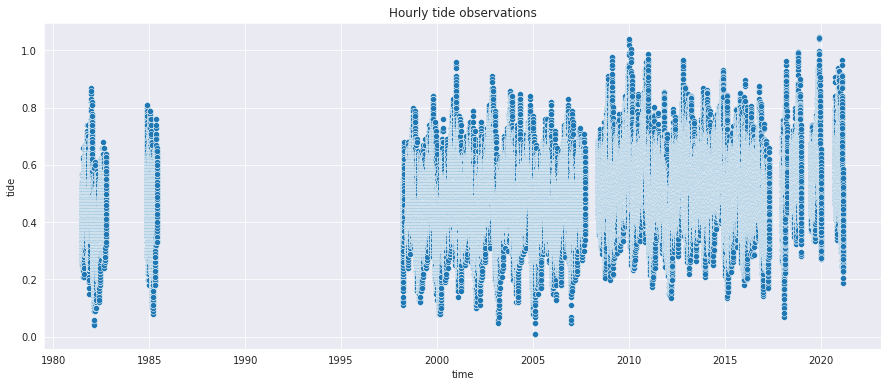

In [ ]:
# visualizing the tide observations over time
plt.figure(figsize=(15,6))
plt.title("Hourly tide observations")
sns.scatterplot(data = tide_df, x= "time", y="tide")

## Analysis
From the figure below we can observe that there's no outlier or suspicious values in this dataset.

# Saving the data

In [ ]:
# saving the data to treated data folder
tide_df.to_csv("../data/treated_data/Nice_tide_hourly.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=034ba23b-0285-4205-883f-43cc7265b20a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>